In [1]:
import os
import json
import glob
import json
import pandas as pd
import numpy as np

In [2]:
def parse_result(path):
    line_list = open(path,'r').readlines()
    lines = [line.strip() for line in line_list]
    end_line = lines[-1].split(', ')
    best_eer = end_line[-1].split(' ')[-1]
    result = {}
    sum_minDCF = 0
    for i,line in enumerate(lines):
        try:
            cur_eer = line.split(', ')[-2].split(' ')[-1]
            cur_best_eer = line.split(', ')[-1].split(' ')[-1]
            if cur_eer == cur_best_eer == best_eer:
                for j in range(i-2,i):
                    splits = lines[j].split(', ')
                    gender = splits[0].split(' ')[-1]
                    eer = splits[1].split(' ')[-1]
                    minDCF = splits[2].split(' ')[-1]
                    result[gender] = {'eer': float(eer.split('%')[0]), 'minDCF': float(minDCF)}
                    sum_minDCF += float(minDCF)
        except :
            pass
    result['overall'] = {'eer': float(best_eer.split('%')[0]), 'minDCF': sum_minDCF/2}
    return result


In [5]:
LOOP = 5

In [4]:
for l in range(LOOP):
    files = glob.glob('./checkpoints_combine/exp3/loop%s/*/score-stage.txt'%(l+1))
    for file in files:
        result = parse_result(file)
        index = file.rfind('/')
        path = file[:index]
        name = 'dev_results.json'
        with open(os.path.join(path, name), 'w') as f:
            json.dump(result,f)

In [25]:
def concate_result(files, loop, store=False):
    data = {
        'phase': [],
        'eer': [],
        'gender': [],
        'minDCF': [],
        'text': [],
        'loop': [],
        'word': []
        }
    parse = files[0].split('/')
    path = '/'.join(parse[:-2])
    for file in files:
        res = json.load(open(file, 'r'))
        splits = file.split('/')
        if 'eval' in splits[-1]:
            phase = 'eval'
        if 'dev' in splits[-1]:
            phase = 'dev'
        if 'all' in splits[-1]:
            phase ='eval'
        text = splits[-2]
        word = text.split('_')[0]
        
        for g in res:
            data['gender'].append(g)
            data['eer'].append(res[g]['eer'])
            data['minDCF'].append(res[g]['minDCF'])
            data['phase'].append(phase)
            data['text'].append(text)
            data['loop'].append(loop)
            data['word'].append(word)
    df = pd.DataFrame(data)
    if store:
        save_path = os.path.join(path, 'all_result.csv')
        print('Save result to %s' % (save_path))
        df.to_csv(save_path, index=False)
    return df

In [28]:
for l in range(LOOP):
    result_files = glob.glob('pretrained_checkpoints/exp3/loop%s/*/all_results.json'%(l+1))
    df = concate_result(result_files,l+1,store=True)

Save result to pretrained_checkpoints/exp3/loop1/all_result.csv
Save result to pretrained_checkpoints/exp3/loop2/all_result.csv
Save result to pretrained_checkpoints/exp3/loop3/all_result.csv
Save result to pretrained_checkpoints/exp3/loop4/all_result.csv
Save result to pretrained_checkpoints/exp3/loop5/all_result.csv


In [9]:
def plot_result(df_all, gender, phase, loop):
    import matplotlib.pyplot as plt
    result = df_all[(df_all['phase'] == phase) & (df_all['gender'] == gender)].sort_values('word')
    # print(result) 
    text = [str(x) for x in range(0,10)]
    plt.figure(figsize=(12,6))
    plt.suptitle('%s - Iteration %s' % (gender, loop))

    plt.subplot(1,2,1)
    plt.bar(text, result['minDCF'],0.4, label='minDCF')
    plt.xticks(ticks=text)
    plt.xlabel('Text')
    plt.ylabel('minDCF')
    
    plt.subplot(1,2,2)
    plt.bar(text, result['eer'],0.4, label='EER')
    plt.xticks(ticks=text)
    plt.xlabel('Text')
    plt.ylabel('EER (%)')
    plt.show()
    

In [41]:
df_all = pd.DataFrame()
MAX_LOOP = 5
for loop in range(1,MAX_LOOP+1):
    df_all = pd.concat([df_all, pd.read_csv('pretrained_checkpoints/exp3/loop%s/all_result.csv'%(loop))], ignore_index=True)

In [42]:
df_all

,phase,eer,gender,minDCF,text,loop,word
0,eval,8.113333,overall,0.461451,0,1,0
1,eval,6.272000,overall,0.356729,3,1,3
2,eval,6.717333,overall,0.399435,6,1,6
3,eval,7.068000,overall,0.434718,1,1,1
4,eval,6.323810,overall,0.408914,5,1,5
5,eval,6.158667,overall,0.435870,9,1,9
6,eval,7.564626,overall,0.389397,2,1,2
7,eval,7.793197,overall,0.446610,4,1,4
8,eval,7.142857,overall,0.417619,7,1,7
9,eval,6.794558,overall,0.377989,8,1,8


In [43]:
def get_result(data,max_loop=3):
    result = {
    }
    genders = ['overall']
    phases = ['eval']
    words = [x for x in range(0,10)]
    for phase in phases:
        result[phase] = {}
        for gender in genders:
            result[phase][gender] = {
                'eer': {},
                'minDCF': {},
            }
            for word in words:
                df = data[(data['phase'] == phase) & (data['gender'] == gender) & (data['word']==word)]
                # print(data['word'])
                result[phase][gender]['eer'][word] = df['eer'].to_list()
                result[phase][gender]['minDCF'][word] = df['minDCF'].to_list()
    return result

                

    

In [44]:
result = get_result(df_all, max_loop=5)

In [45]:
json.dump(result, open('pretrained_checkpoints/result_stage2_exp3_all.json', 'w'))

In [46]:
import matplotlib.pyplot as plt

In [60]:
def show_result(result, metric='eer',loop=3, all=False):
    if all:
        genders = ['overall']
    else:
        genders =  ['female','male','overall']
    for gender in genders:
        plt.figure(figsize=(12,4))
        name_set = list(result.keys())
        a = []
        # for v in result['dev'][gender][metric].values():
        #     a.extend(v)
        for v in result['eval'][gender][metric].values():
            a.extend(v)
        min_ = min(a)
        max_ = max(a)
        for idx,set in enumerate(name_set):
            plt.subplot(1,len(name_set),idx+1)
            set_result = result[set]
            for i in range(0,10):
                plt.plot([j for j in range(1, loop+1)],set_result[gender][metric][i])
            plt.legend([i for i in range(0,10)])
            plt.xticks([ i for i in range(1,loop+2)])
            plt.xlabel('Loop')
            plt.ylim((min_-1,max_+1))
            plt.ylabel(metric)
            plt.title(gender)
        # plt.savefig('results/output_exp1_%s.png'%(gender))

In [58]:
def show_result_2(result, metric='eer',loop=5):
    for gender in ['female','male','overall']:
        plt.figure(figsize=(12,4))
        name_set = list(result.keys())
        for idx,set in enumerate(name_set):
            plt.subplot(1,len(name_set),idx+1)
            set_result = result[set]
            values = []
            for i in range(0,10):
                values.append(set_result[gender][metric][str(i)])
            
            values = np.mean(values, axis=0)
            plt.plot(values)
            plt.legend([i for i in range(0,10)])
            plt.xticks([ i for i in range(1,loop+2)])
            plt.xlabel('Loop')
            plt.ylim((np.min(values)-1,np.max(values)+1))
            plt.ylabel(metric)
            plt.title(gender)
        # plt.savefig('results/output_exp1_%s.png'%(gender))

In [53]:
result = {}
result['1'] = json.load(open('pretrained_checkpoints/result_stage2_exp1_all.json','r'))
result['2'] = json.load(open('pretrained_checkpoints/result_stage2_exp2_all.json','r'))
result['3'] = json.load(open('pretrained_checkpoints/result_stage2_exp3_all.json','r'))


In [54]:
MAX_LOOP = 5
phases = ['eval']
metrics = ['eer', 'minDCF']
genders = ['overall']
final_result = {}
for phase in phases:
    final_result[phase] = {}
    for gender in genders:
        final_result[phase][gender] = {}
        for metric in metrics:
            final_result[phase][gender][metric] = {}
            for i in range(0,10):
                temp = []
                for exp in result:
                    temp.append(result[exp][phase][gender][metric][str(i)][:MAX_LOOP])
                value = np.mean(temp, axis=0)
                final_result[phase][gender][metric][i] = value





In [55]:
final_result

{'eval': {'overall': {'eer': {0: array([7.85288889, 8.6159093 , 8.23401361, 8.43155556, 8.84263039]),
    1: array([7.21111111, 8.55656236, 8.02943311, 7.95863039, 7.81043084]),
    2: array([8.16465306, 9.10266667, 9.29094785, 8.54816327, 8.04995011]),
    3: array([6.50266667, 6.7710839 , 6.85268934, 7.1226576 , 6.85485714]),
    4: array([7.1915102 , 8.18533333, 7.66687528, 8.78002721, 8.46088889]),
    5: array([6.94058957, 7.74844444, 8.44133333, 7.72584127, 7.99893878]),
    6: array([6.71664399, 6.05422222, 6.67960998, 6.21722449, 6.78878005]),
    7: array([7.3545941 , 7.728     , 8.00634921, 7.77777778, 7.88762812]),
    8: array([7.48208617, 7.44599546, 7.18069841, 6.87756009, 6.89406803]),
    9: array([6.14014512, 6.78511565, 6.99711565, 7.0041542 , 6.68117914])},
   'minDCF': {0: array([0.46113778, 0.51594721, 0.48398041, 0.48333696, 0.50692082]),
    1: array([0.46161995, 0.50184744, 0.48094132, 0.48476118, 0.46632082]),
    2: array([0.42328816, 0.45976871, 0.47228   , 0

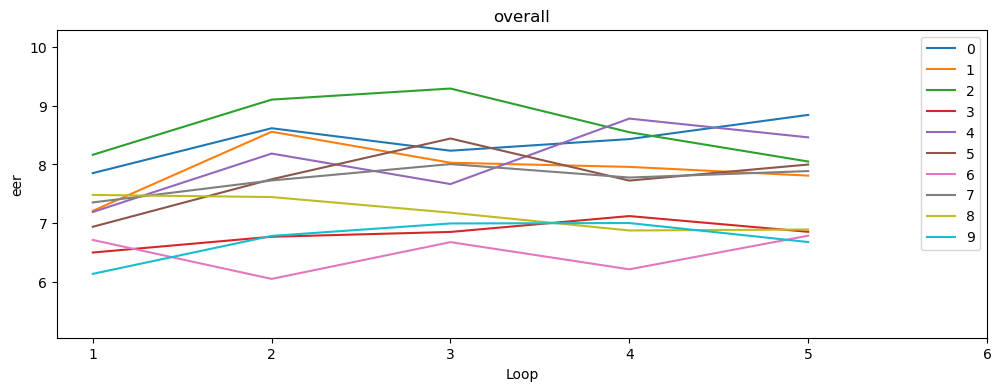

In [61]:
show_result(final_result,metric='eer', loop=5,all=True)